In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
#use inspector to explore database without toggling between notebook and file
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
columns = inspector.get_columns('measurement')

for col in columns:
    
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns = inspector.get_columns('station')

for col in columns:
    
    print(col['name'], col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [10]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [11]:
#Reflect Database 
Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.station
Measurement = Base.classes.measurement

In [12]:
# results = session.query(Measurement)

# Exploratory Climate Analysis

In [13]:
#Start a session to query the 
session = Session(engine)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# results = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()


('2017-08-23')

In [15]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [16]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= query_date)\
    .order_by(Measurement.date.desc()).all()

In [17]:
# Save the query results as a Pandas DataFrame and # Sort the dataframe by date
df = pd.DataFrame(results, columns=['date', 'prcp'])

In [18]:
df.head()

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [19]:
df.sort_values(by=["date"])

,date,prcp
2229,2016-08-23,0.70
2223,2016-08-23,0.00
2224,2016-08-23,0.15
2228,2016-08-23,1.79
2226,2016-08-23,NaN
...,...,...
4,2017-08-22,0.00
3,2017-08-23,0.45
2,2017-08-23,0.08
1,2017-08-23,0.00


In [20]:
#set the index to the date column = #df.set_index('date', inplace=True)
df.set_index('date', inplace=True)
df.head()

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
# fig, ax = plt.subplots()
# ypos = range(1, len(date))
# ax.barh(ypos, date)
# ax.set_xlabel("Date")
# ax/set_ylabel("Prcp")
# ax.set_yticks(ypos)
# ax.set_yticklables(prcp)
# ax.set_title("Precipitation Analysis")
# fig.tight_layout()
# plt.show()

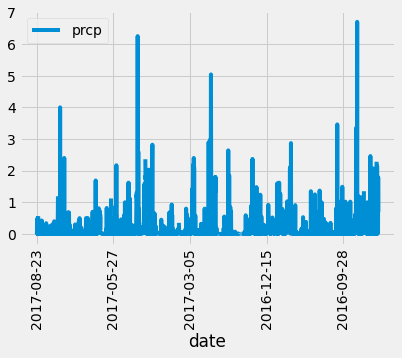

In [22]:
df.plot(rot=90)

In [23]:
# df['date'].plot.barh(title='Precipitation Analysis')
# df.plot.barh(title="Precipitation Analysis")
#plt.show()
# df = pd.DataFrame(results, columns=["date", "prcp"])
# df.set_index("date", inplace=True)
# df.plot.barh()

# plt.show()

In [24]:
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
# Design a query to show how many stations are available in this dataset?
# station_data = df.[]
# df.sort_values(["stations"]).unique

In [26]:
# Perform a query to retrieve the data and precipitation scores
# results = session.query(Measurement.date, Measurement.prcp)\
#     .filter(Measurement.date >= query_date)\
#     .order_by(Measurement.date.desc()).all()


In [27]:
#  Station Analysis
# Design a query to calculate the total number of stations.
session.query(func.count(Station.station)).all()
# print(results_stations)

[(9)]

In [28]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station,Station.name,func.count(Measurement.prcp))\
.group_by(Station.name)\
.filter(Measurement.station == Station.station)\
.order_by(func.count(Measurement.prcp).desc()).all()
 
most_active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('USC00517948', 'PEARL CITY, HI US', 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 342)]

In [29]:
most_active_stations_df = pd.DataFrame(most_active_stations, columns=['id', 'name', 'counts'])
most_active_stations_df


,id,name,counts
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00513117,"KANEOHE 838.1, HI US",2696
2,USC00519397,"WAIKIKI 717.2, HI US",2685
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2572
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2484
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1937
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1932
7,USC00517948,"PEARL CITY, HI US",683
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",342


In [30]:
most_active_stations_df.head(1)

,id,name,counts
0,USC00519281,"WAIHEE 837.5, HI US",2772


In [31]:
# Using the station id from the previous query, # Choose the station with the highest number of temperature observations recorded USING FUNC.MAX
#HAVE TO PERFORM A JOIN ON ID; HAVING AN ISSUE


In [32]:
session = Session(engine)

In [33]:
# Query the last 12 months of temperature observation data for this station (TOBS) and plot the results as a histogram

#note results=session.query(Measurement.date).order_by(Measurement.date.desc()).first() WAS YOUR PROBLEM/DIDN'T WORK FOR FUTURE REFERENCE
session.query(Measurement.date, Measurement.tobs).order_by(Measurement.date.desc()).all()





[('2017-08-23', 81.0),
 ('2017-08-23', 82.0),
 ('2017-08-23', 82.0),
 ('2017-08-23', 76.0),
 ('2017-08-22', 82.0),
 ('2017-08-22', 82.0),
 ('2017-08-22', 76.0),
 ('2017-08-21', 81.0),
 ('2017-08-21', 79.0),
 ('2017-08-21', 82.0),
 ('2017-08-21', 76.0),
 ('2017-08-20', 81.0),
 ('2017-08-20', 80.0),
 ('2017-08-20', 78.0),
 ('2017-08-19', 79.0),
 ('2017-08-19', 80.0),
 ('2017-08-19', 85.0),
 ('2017-08-19', 71.0),
 ('2017-08-18', 80.0),
 ('2017-08-18', 77.0),
 ('2017-08-18', 79.0),
 ('2017-08-18', 76.0),
 ('2017-08-17', 78.0),
 ('2017-08-17', 83.0),
 ('2017-08-17', 76.0),
 ('2017-08-17', 72.0),
 ('2017-08-16', 82.0),
 ('2017-08-16', 79.0),
 ('2017-08-16', 76.0),
 ('2017-08-16', 71.0),
 ('2017-08-15', 78.0),
 ('2017-08-15', 82.0),
 ('2017-08-15', 79.0),
 ('2017-08-15', 77.0),
 ('2017-08-15', 70.0),
 ('2017-08-14', 79.0),
 ('2017-08-14', 81.0),
 ('2017-08-14', 75.0),
 ('2017-08-14', 77.0),
 ('2017-08-14', 79.0),
 ('2017-08-13', 81.0),
 ('2017-08-13', 81.0),
 ('2017-08-13', 84.0),
 ('2017-08-

In [34]:
session.query(Measurement.date, Measurement.tobs).order_by(Measurement.date.desc()).first()

('2017-08-23', 81.0)

In [35]:
# Design a query to retrieve the last 12 months of temp data
query_tobs_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("TOBS Query Date: ", query_date)

TOBS Query Date:  2016-08-23


In [36]:
 # Perform a query to retrieve the last 12 months of TOBS
results = session.query(Measurement.station, Measurement.date, Measurement.tobs)\
    .filter(Measurement.date >= query_date)\
    .order_by(Measurement.date.desc()).all()

results

[('USC00519397', '2017-08-23', 81.0),
 ('USC00514830', '2017-08-23', 82.0),
 ('USC00519523', '2017-08-23', 82.0),
 ('USC00516128', '2017-08-23', 76.0),
 ('USC00519397', '2017-08-22', 82.0),
 ('USC00519523', '2017-08-22', 82.0),
 ('USC00516128', '2017-08-22', 76.0),
 ('USC00519397', '2017-08-21', 81.0),
 ('USC00514830', '2017-08-21', 79.0),
 ('USC00519523', '2017-08-21', 82.0),
 ('USC00516128', '2017-08-21', 76.0),
 ('USC00519397', '2017-08-20', 81.0),
 ('USC00514830', '2017-08-20', 80.0),
 ('USC00516128', '2017-08-20', 78.0),
 ('USC00519397', '2017-08-19', 79.0),
 ('USC00514830', '2017-08-19', 80.0),
 ('USC00519523', '2017-08-19', 85.0),
 ('USC00516128', '2017-08-19', 71.0),
 ('USC00519397', '2017-08-18', 80.0),
 ('USC00514830', '2017-08-18', 77.0),
 ('USC00519281', '2017-08-18', 79.0),
 ('USC00516128', '2017-08-18', 76.0),
 ('USC00514830', '2017-08-17', 78.0),
 ('USC00519523', '2017-08-17', 83.0),
 ('USC00519281', '2017-08-17', 76.0),
 ('USC00516128', '2017-08-17', 72.0),
 ('USC005148

In [62]:
session.query(func.max(Measurement.station)).all()

[('USC00519523')]

In [66]:
df = pd.DataFrame(results, columns= ["station", "date", "tobs"]) 

In [57]:
# Save the query results as a Pandas DataFrame and # Sort the dataframe 
df = pd.DataFrame(results, columns=['station', 'date', 'tobs'])


In [70]:
df

,station,date,tobs
0,USC00519397,2017-08-23,81.0
1,USC00514830,2017-08-23,82.0
2,USC00519523,2017-08-23,82.0
3,USC00516128,2017-08-23,76.0
4,USC00519397,2017-08-22,82.0
...,...,...,...
2225,USC00514830,2016-08-23,80.0
2226,USC00517948,2016-08-23,80.0
2227,USC00519523,2016-08-23,80.0
2228,USC00519281,2016-08-23,77.0


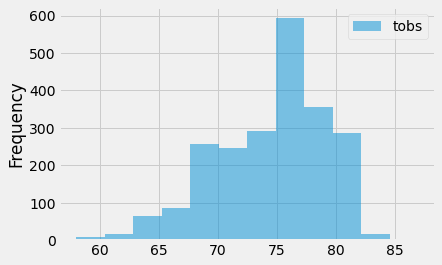

In [71]:
ax = df.plot.hist(bins=12, alpha=0.5)


In [38]:
df.tail()

,station,date,tobs
2225,USC00514830,2016-08-23,80.0
2226,USC00517948,2016-08-23,80.0
2227,USC00519523,2016-08-23,80.0
2228,USC00519281,2016-08-23,77.0
2229,USC00516128,2016-08-23,74.0


In [39]:
df.head()

,station,date,tobs
0,USC00519397,2017-08-23,81.0
1,USC00514830,2017-08-23,82.0
2,USC00519523,2017-08-23,82.0
3,USC00516128,2017-08-23,76.0
4,USC00519397,2017-08-22,82.0
